# RANDOM FOREST

## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
fraud_data=pd.read_csv('Fraud_check (1).csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_data.drop_duplicates()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Here we creating new coloums for risky and good with the help of PD.cut method1

In [5]:
fraud_data["Taxable.Income"]= pd.cut(fraud_data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [6]:
fraud_data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


# HERE we convert label variables into numbers

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
cols=['Undergrad','Marital.Status','Urban','Taxable.Income']

In [9]:
fraud_data[cols]=fraud_data[cols].apply(LabelEncoder().fit_transform)

In [10]:
fraud_data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0
6,0,0,0,80890,8,1
7,1,2,0,131253,3,1
8,0,2,0,102481,12,1
9,1,0,0,155482,4,1


In [11]:
fraud_data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


In [12]:
fraud_data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"TaxInc","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [13]:
fraud_data

,undergrad,marital,TaxInc,population,experience,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


# MODEL BUIDLING`

In [14]:
x=fraud_data.drop('TaxInc',axis=1)
y=fraud_data[['TaxInc']]

In [15]:
y.value_counts()

TaxInc
0         476
1         124
dtype: int64

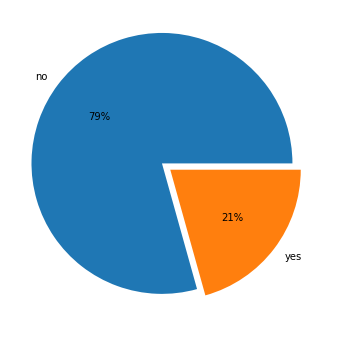

In [16]:
plt.figure(figsize=(8,6))
plt.pie(x=y.value_counts(),explode=[0.08,0],labels=['no','yes'],autopct='%1.0f%%')
plt.show()

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=123,stratify=y)

In [19]:
xtrain.shape,ytrain.shape

((480, 5), (480, 1))

# MODEL TRAINING

In [113]:
rf_model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=3)

In [114]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3)

In [115]:
grid=GridSearchCV(estimator=rf_model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14]},cv=5)

In [93]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14]})

In [94]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [95]:
grid.best_score_

0.7933333333333332

# model testing

In [116]:
ypredtrain=rf_model.predict(xtrain)

# model evaluation

# train data

In [117]:
print(confusion_matrix(ytrain,ypredtrain))

[[381   0]
 [ 99   0]]


In [118]:
print(accuracy_score(ytrain,ypredtrain))

0.79375


# test data

In [123]:
ytestpred=rf_model.predict(xtest)

In [124]:
print(confusion_matrix(ytest,ytestpred))

[[95  0]
 [25  0]]


In [125]:
print(classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [126]:
print(accuracy_score(ytest,ytestpred))

0.7916666666666666


# from kfold

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [111]:
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(rf_model,x,y, cv =kfold)

In [112]:
results.mean()

0.7933333333333333